# Yelp Reviews Dataset Project

##                                                          Problem statement
####                                                          Does the yelp review belong to a 1 star category or 5 star category?
  Yelp Reviews will be classified into 1 star or 5 star categories based off the text content in the reviews. 

Using the Yelp data from Kaggle [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each row in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.



## Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

## The Data

**Reading the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
yelp=pd.read_csv('yelp.csv')

** Head, info,and describe methods on yelp will help us to understand the data better.**

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Createing a new column called "text length" which is the number of words in the text column.**

In [6]:
yelp['text length']= yelp.text.apply(len)

In [7]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# Exploratory Data Analysis

Let's explore the data


**Using FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.**

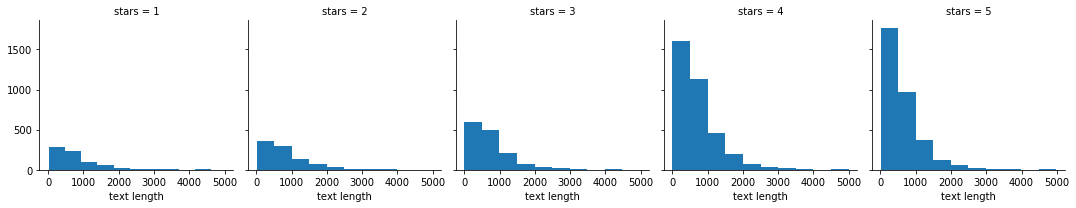

In [8]:
g=sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

**Boxplot of text length for each star category.**

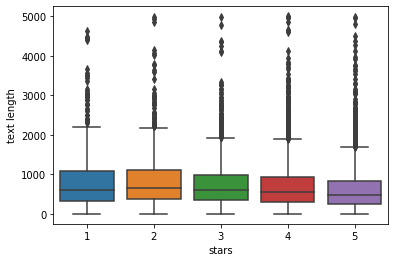

In [9]:
sns.boxplot(x= 'stars',y='text length',data=yelp)

**Countplot of the number of occurrences for each type of star rating.**

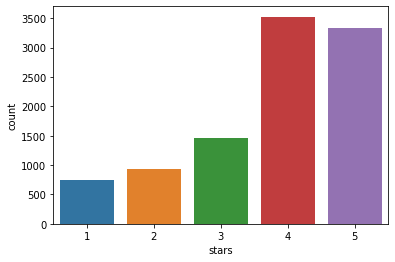

In [10]:
sns.countplot(yelp['stars'])

** Mean values of the numerical columns**

In [11]:
yelp_gp=yelp.groupby('stars').mean()
yelp_gp

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**corr() method on that groupby dataframe to produce this dataframe:**

In [12]:
yelp_gp.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then useing seaborn to create a heatmap based off that .corr() dataframe:**

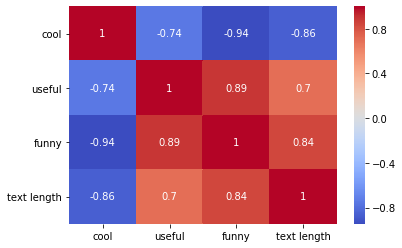

In [13]:
sns.heatmap(yelp_gp.corr(),cmap='coolwarm',annot=True)

**From the heatmap, we can tell that useful and funny have a high correlation. Also, its good to note that text length and useful are also correlated.**

## Data preprocessing

Let's grab reviews that were either 1 star or 5 stars.


In [14]:
yelp_class=yelp[(yelp['stars']==5 )|(yelp['stars']==1 )]

** Creating two objects features and target. **

In [15]:
#features will be the 'text' column of yelp_class and target will be the 'stars' column of yelp_class.
features= yelp_class['text']
target= yelp_class['stars']

#Using the fit_transform method on the CountVectorizer object and pass in features(text column).
#Save this result by overwriting features.
cv = CountVectorizer()
features=cv.fit_transform(features)

In [16]:
#Let's split our data into training and testing data. The split will be 80/20. Training data-80%,testdata-20%
text_train, text_test, target_train, target_test = train_test_split( features, target, test_size=0.30, random_state=101)

## Training a Model

Time to train a model!

** Creating an instance of the estimator and call is nb **

In [17]:
#Now fit nb using the training data.
nb=MultinomialNB()
nb.fit(text_train, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from feature_test.**

In [18]:
predict= nb.predict(text_test)

** Create a confusion matrix and classification report using these predictions and target_test **

In [19]:
print(confusion_matrix(target_test,predict))
print(classification_report(target_test,predict))

[[159  69]
 [ 22 976]]
             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



**This is great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

## Using Text Processing


** Creating a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [20]:
pipeline=Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('Classifier', MultinomialNB())
])

## Using the Pipeline

**This pipeline has all the pre-process steps in it already, meaning we'll need to re-split the original data (as I overwrote features as the CountVectorized version. I need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [21]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.30, random_state=101)

**Now fit the pipeline to the training data. We can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [22]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('Classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. **

In [23]:
predic= pipeline.predict(X_test)
print(confusion_matrix(y_test,predic))
print(classification_report(y_test,predic))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**It is strange that Tf-Idf classification report is showing 0 True postives**

## Conclution
Looks like Tf-Idf actually made things worse! Changing the ML model itself will not help all the time. Multinomial NB gives us a better accuracy when compared to TF-Idf in our case.

### Future Work
Trying pipeline steps and seeing if creating a custom analyzer helps. Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. 